In [61]:
import numpy as np
import pandas as pd

In [62]:
path = '../data/ruwiki-yo-segments.txt'
with open(path, 'r', encoding='utf-8') as file:
    data = file.readlines()

In [63]:
len(data)

1000000

In [64]:
data[0]

'147#Изменяя толщину слоя одного из сравниваемых растворов или интенсивность светового потока, наблюдатель добивается, чтобы цветовые тона двух частей поля зрения были неотличимы на глаз, после чего по известным соотношениям между , и с может быть определена концентрация исследуемого раствора.Фотоэлектрические колориметры (фотоколориметры) обеспечивают большую точность измерений, чем визуальные; в качестве приёмников излучения в них используются фотоэлементы (селеновые и вакуумные), фотоэлектронные умножители, фоторезисторы (фотосопротивления) и фотодиоды.\n'

In [65]:
data[1]

'147#Сила фототока приёмников определяется интенсивностью падающего на них света и, следовательно, степенью его поглощения в растворе (тем большей, чем выше концентрация).\n'

In [66]:
data[2]

'147#Помимо фотоэлектрического колориметра (фотоколориметра) с непосредственным отсчётом силы тока, распространены компенсационные колориметры, в которых разность сигналов, соответствующих стандартному и измеряемому растворам, сводится к нулю (компенсируется) электрическим или оптическим компенсатором (например, клином фотометрическим); отсчёт в этом случае снимается со шкалы компенсатора.\n'

In [67]:
data[3]

'148#Фотометр Фото метр прибор для измерения каких-либо из фотометрических величин, чаще других одной или нескольких световых величин.При использовании фотометра осуществляют определённое пространственное ограничение потока излучения и регистрацию его приёмником излучения с заданной спектральной чувствительностью.\n'

Видно, что периодически проскакивают «слипшиеся» предложения.

Напишем простое регулярное выражение, которое будет делить нам такие «слипшиеся» предложения.

In [68]:
import re

In [69]:
GLUED_SENTENCES_BORDER_REGEX = re.compile(r'([\w\d\s])\.([А-ЯЁ])')

In [70]:
text = data[3][:]
print('Before')
print('-------')
print(text)

text = GLUED_SENTENCES_BORDER_REGEX.sub(r'\1.\n\2', text)

print('After')
print('------')
print(text)

Before
-------
148#Фотометр Фото метр прибор для измерения каких-либо из фотометрических величин, чаще других одной или нескольких световых величин.При использовании фотометра осуществляют определённое пространственное ограничение потока излучения и регистрацию его приёмником излучения с заданной спектральной чувствительностью.

After
------
148#Фотометр Фото метр прибор для измерения каких-либо из фотометрических величин, чаще других одной или нескольких световых величин.
При использовании фотометра осуществляют определённое пространственное ограничение потока излучения и регистрацию его приёмником излучения с заданной спектральной чувствительностью.



Применем его на всем корпусе!

In [71]:
data = ''.join(data)
data = GLUED_SENTENCES_BORDER_REGEX.sub(r'\1.\n\2', data)
data = data.split('\n')

# должно получиться значительно больше предложений
len(data)

1276159

In [72]:
data[0]

'147#Изменяя толщину слоя одного из сравниваемых растворов или интенсивность светового потока, наблюдатель добивается, чтобы цветовые тона двух частей поля зрения были неотличимы на глаз, после чего по известным соотношениям между , и с может быть определена концентрация исследуемого раствора.'

In [73]:
data[1]

'Фотоэлектрические колориметры (фотоколориметры) обеспечивают большую точность измерений, чем визуальные; в качестве приёмников излучения в них используются фотоэлементы (селеновые и вакуумные), фотоэлектронные умножители, фоторезисторы (фотосопротивления) и фотодиоды.'

In [74]:
data[3]

'147#Помимо фотоэлектрического колориметра (фотоколориметра) с непосредственным отсчётом силы тока, распространены компенсационные колориметры, в которых разность сигналов, соответствующих стандартному и измеряемому растворам, сводится к нулю (компенсируется) электрическим или оптическим компенсатором (например, клином фотометрическим); отсчёт в этом случае снимается со шкалы компенсатора.'

In [75]:
data = list(filter(bool, data))
len(data)

1276158

In [76]:
import pandas as pd
from typing import List


def as_dataframe(data: List[str], sep: str = '#') -> pd.DataFrame:
    newdata = []
    for text in data:
        l, s, r = text.partition(sep)
        if not s:
            newdata.append((None, l))
        else:
            newdata.append((l, r))
            
    df = pd.DataFrame(newdata, columns=('record_id', 'text'))
    df['length'] = df.text.apply(len)
    df.record_id = df.record_id.bfill()
    return df

In [77]:
df = as_dataframe(data)

In [78]:
df.head()

,record_id,text,length
0,147,Изменяя толщину слоя одного из сравниваемых ра...,289
1,147,Фотоэлектрические колориметры (фотоколориметры...,268
2,147,Сила фототока приёмников определяется интенсив...,166
3,147,Помимо фотоэлектрического колориметра (фотокол...,387
4,148,Фотометр Фото метр прибор для измерения каких-...,129


In [79]:
df.length.describe()

count    1.276158e+06
mean     1.624082e+02
std      1.993962e+02
min      1.000000e+00
25%      8.000000e+01
50%      1.290000e+02
75%      1.980000e+02
max      5.604800e+04
Name: length, dtype: float64

In [80]:
for sample in df.sample(10).itertuples():
    print(sample.text + '\n')

Из описаний его путешествий вышла только первая часть, переведённая на немецкий язык под заглавием " , 1849-57" (Пешт, 1859).

Влад Дёмин 2009 

главный герой: Артём Ромашин

Различные части книги публиковались в журнальных вариантах по мере написания."Повесть о жизни" состоит из шести книг: "Далёкие годы" (1946), "Беспокойная юность" (1954), "Начало неведомого века" (1956), "Время больших ожиданий" (1958), "Бросок на юг" (1959 1960), "Книга скитаний" (1963).

При температурах " " 10 К становятся возможными следующие реакции:: 1: 2Первая реакция это распад ядра трития с энерговыделением 18 кэВ, вторая, обратная реакция, идёт при энергиях электрона выше 18 кэВ.

Двадцатое издание оформил художник и актёр (в корешок каждого тома он поместил небольшое прозрачное окошко с каким-либо предметом за ним, "олицетворяющим" данный том).

ФГБНУ Прикаспийский научно-исследовательский институт аридного земледелия, адрес: Астраханская область, Черноярский район, с. Солёное Займище, квартал Северный, 

Тексты близки к идеальным, разве что можно поправить «висящие» точки и запятые (с пробелом перед ними) и заново проверить вхождение буквы «Ё» во вновь полученные предложения.

In [81]:
HANGING_PUNCT_REGEX = re.compile(r'\s([.,:;!?])')

In [82]:
text = 'Его открытие состоялось при губернаторе графе Дмитрии Николаевиче Толстом согласно торжественному "церемониалу", который был утверждён императором Александром .'

print('Before:')
print(text)
print('--')

text = HANGING_PUNCT_REGEX.sub(r'\1', text)

print('After:')
print(text)
print('--')


text = 'Существует также , считающий, что буддизм в своей сущности не является религиозным учением, отрицающий какую-либо веру и уделяющий значительное внимание буддийской медитации'

print('Before:')
print(text)
print('--')

text = HANGING_PUNCT_REGEX.sub(r'\1', text)

print('After:')
print(text)
print('--')

Before:
Его открытие состоялось при губернаторе графе Дмитрии Николаевиче Толстом согласно торжественному "церемониалу", который был утверждён императором Александром .
--
After:
Его открытие состоялось при губернаторе графе Дмитрии Николаевиче Толстом согласно торжественному "церемониалу", который был утверждён императором Александром.
--
Before:
Существует также , считающий, что буддизм в своей сущности не является религиозным учением, отрицающий какую-либо веру и уделяющий значительное внимание буддийской медитации
--
After:
Существует также, считающий, что буддизм в своей сущности не является религиозным учением, отрицающий какую-либо веру и уделяющий значительное внимание буддийской медитации
--


In [83]:
data = '\n'.join(data)
data = HANGING_PUNCT_REGEX.sub(r'\1', data)
data = data.split('\n')
data = list(map(lambda s: s + '.' if (s[0].istitle() and not s.endswith('.')) else s, data))
print(len(data))

1276158


In [84]:
df = as_dataframe(data)

df.head()

,record_id,text,length
0,147,Изменяя толщину слоя одного из сравниваемых ра...,288
1,147,Фотоэлектрические колориметры (фотоколориметры...,268
2,147,Сила фототока приёмников определяется интенсив...,166
3,147,Помимо фотоэлектрического колориметра (фотокол...,387
4,148,Фотометр Фото метр прибор для измерения каких-...,129


In [85]:
df.length.describe()

count    1.276158e+06
mean     1.623203e+02
std      1.993039e+02
min      1.000000e+00
25%      8.000000e+01
50%      1.290000e+02
75%      1.970000e+02
max      5.604800e+04
Name: length, dtype: float64

In [86]:
df = df[df.text.str.lower().str.find('ё').ne(-1)]
df.head()

,record_id,text,length
1,147,Фотоэлектрические колориметры (фотоколориметры...,268
2,147,Сила фототока приёмников определяется интенсив...,166
3,147,Помимо фотоэлектрического колориметра (фотокол...,387
5,148,При использовании фотометра осуществляют опред...,181
6,148,"Освещённость измеряют люксметрами, яркость ярк...",124


In [87]:
len(df)

1052191

В заключении проведем IQR-чистку

In [88]:
def clean_by_iqr(
    data: pd.DataFrame,
    column: str, 
    q1: float = 0.25, 
    q3: float = 0.75, 
    offset: float = 1.5
) -> pd.DataFrame:
    lo = data[column].quantile(q1)
    hi = data[column].quantile(q3)
    dt = offset * (hi - lo)

    return data[data[column].between(lo - dt, hi + dt, inclusive='both')]

count    1.052191e+06
mean     4.800808e+00
std      8.534451e-01
min      0.000000e+00
25%      4.406719e+00
50%      4.890349e+00
75%      5.318120e+00
max      1.093396e+01
Name: loglen, dtype: float64


<AxesSubplot: >

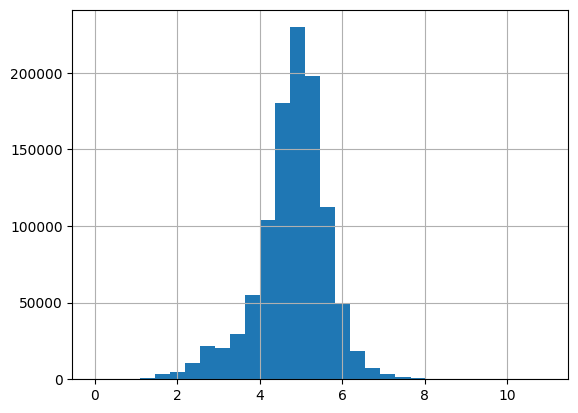

In [89]:
df['loglen'] = df.length.apply(np.log)
# df.loc[lambda x: x.loglen.eq(np.inf), 'loglen'] = df.loglen[lambda x: x.ne(np.inf)].max()
print(df.loglen.describe())
df.loglen.hist(bins=30)

count    1.052191e+06
mean     4.800808e+00
std      8.534451e-01
min      0.000000e+00
25%      4.406719e+00
50%      4.890349e+00
75%      5.318120e+00
max      1.093396e+01
Name: loglen, dtype: float64
count    995605.000000
mean          4.889276
std           0.664821
min           3.044522
25%           4.477337
50%           4.919981
75%           5.327876
max           6.684612
Name: loglen, dtype: float64
count    995605.000000
mean        163.990347
std         112.438286
min          21.000000
25%          88.000000
50%         137.000000
75%         206.000000
max         800.000000
Name: length, dtype: float64


<AxesSubplot: >

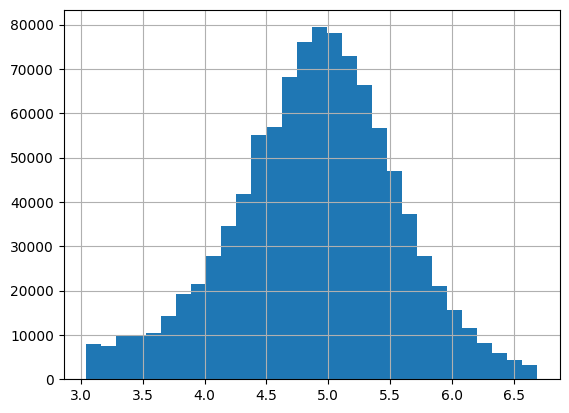

In [90]:
print(df.loglen.describe())
cdf = clean_by_iqr(df, 'loglen', offset=1.5)

print(cdf.loglen.describe())
print(cdf.length.describe())
cdf.loglen.hist(bins=30)

<AxesSubplot: >

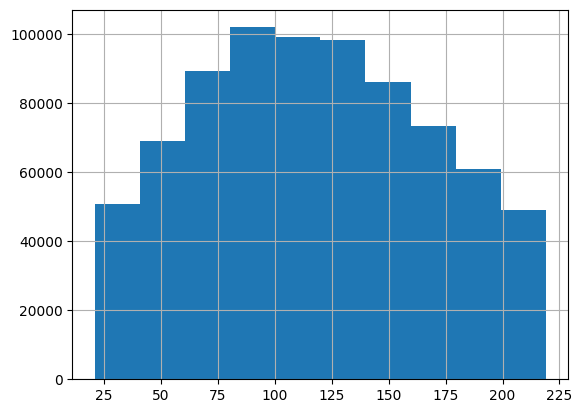

In [91]:
df = cdf[lambda x: x.length.lt(220)]
df.length.hist(bins=10)

In [92]:
df.sample(10)

,record_id,text,length,loglen
1104072,245315,Воскресение из мёртвых Воскресение или анастаз...,92,4.521789
1149915,261069,Первая персональная выставка Арбус состоялась ...,127,4.844187
974362,194997,"Временно отменён маршрут 14 ""Посёлок Солнечный...",151,5.017280
237449,27155,По состоянию на 2020 год площадь посева зернов...,158,5.062595
639878,110018,"1988 4 номинации на премию ""Золотой глобус"": л...",202,5.308268
155693,16047,"Универсум живёт, растёт в процессе творческого...",217,5.379897
1064474,229982,":::::: И одно слово я кричу,::: Кричу: ""Люблю!...",92,4.521789
827390,156388,"Раскопки, которые в этом месте перед Первой ми...",170,5.135798
844829,160888,Пищухи получили своё название из-за разнообраз...,144,4.969813
850571,162447,"В 2021 после выхода фильма ""Не время умирать"" ...",131,4.875197


In [93]:
import sys

sys.path.append('..')
from src import yodict

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [94]:
df = df.reset_index(drop=True)
len(df)

777934

In [95]:
from src import eyo


sfyo = eyo.Eyo(yodict.get_safe())
nsyo = eyo.Eyo(yodict.get_not_safe())

In [96]:
len(sfyo.dictionary), len(nsyo.dictionary)

(229386, 54723)

In [97]:
from tqdm import tqdm

unique = set()
unknown = {}
indices = []

exist = 0
total = 0


def isknown(eword: str) -> bool:
    if eword in nsyo.dictionary or eword in sfyo.dictionary:
        return True
    if eword.lower().startswith('не'):
        eword = eword[2:].capitalize() if not eword.islower() else eword[2:]
        return isknown(eword)
    return False


for i, sample in enumerate(tqdm(df.itertuples(), total=len(df))):
    ewords = []
    for match in re.finditer(eyo.WORDS_REGEX, sample.text):
        word = match.group()
        if word.lower().find('ё') == -1:
            continue
        unique.add(word)
        total += 1
        eword = word.replace('Ё', 'Е').replace('ё', 'е')
        if isknown(eword):
            exist += 1
            ewords.append(eword)
            continue
        unknown[eword] = word
    if any((eword in nsyo.dictionary) for eword in ewords):
        indices.append(i)

print(f'Word coverage: {(1 - len(unknown) / len(unique)) * 100:.2f}')
print(f'Replacement coverage: {exist / total * 100:.2f}')

100%|██████████| 777934/777934 [00:07<00:00, 103480.57it/s]

Word coverage: 68.20
Replacement coverage: 96.87


In [98]:
unknown

{'трехлинзовые': 'трёхлинзовые',
 'времяпролетная': 'времяпролётная',
 'времяпролетного': 'времяпролётного',
 'времяпролетным': 'времяпролётным',
 'репортерного': 'репортёрного',
 'Эртебелле': 'Эртебёлле',
 'Рерик': 'Рёрик',
 'ведшем': 'вёдшем',
 'Хейре': 'Хёйре',
 'Хиллеред': 'Хиллерёд',
 'Хельсингере': 'Хельсингёре',
 'Хег': 'Хёг',
 'Йергена': 'Йёргена',
 'Эльвстрем': 'Эльвстрём',
 'осередки': 'осерёдки',
 'Тема': 'Тёма',
 'Васев': 'Васёв',
 'жинес': 'жинёс',
 'Лепкальне': 'Лепкальнё',
 'Диджейи': 'Диджёйи',
 'замерзши': 'замёрзши',
 'Прейс': 'Прёйс',
 'преобретенной': 'преобретённой',
 'Бренстеда': 'Брёнстеда',
 'буллезный': 'буллёзный',
 'Лефевра': 'Лефёвра',
 'монослоев': 'монослоёв',
 'ще': 'щё',
 'Велер': 'Вёлер',
 'четыреххло': 'четырёххло',
 'Мелкораспыленный': 'Мелкораспылённый',
 'Заверткина': 'Завёрткина',
 'Энгестрема': 'Энгестрёма',
 'забредшего': 'забрёдшего',
 'Кесси': 'Кёсси',
 'приведшее': 'привёдшее',
 'Ферстер': 'Фёрстер',
 'желобов': 'жёлобов',
 'горькозем': 'горьк

In [99]:
import json

with open('unknown.json', 'w', encoding='utf-8') as file:
    json.dump(unknown, file, indent=2, ensure_ascii=False)

In [100]:
ndf = df.iloc[indices].reset_index(drop=True)
len(ndf)

104175

## Подготовим данные для модели

In [101]:
df.head()

,record_id,text,length,loglen
0,147,Сила фототока приёмников определяется интенсив...,166,5.111988
1,148,При использовании фотометра осуществляют опред...,181,5.198497
2,148,"Освещённость измеряют люксметрами, яркость ярк...",124,4.820282
3,148,"Если в качестве приёмника используется глаз, ф...",181,5.198497
4,148,"Оптический блок фотометра, иногда называемый ф...",179,5.187386


In [104]:
df.sort_values('length')

,record_id,text,length,loglen
298074,80581,жён изменников родины,21,3.044522
229302,55308,Песня о весёлом ветре,21,3.044522
306731,82828,Зелёные лёгкие Польши,21,3.044522
536064,168572,пират в чёрном жилете,21,3.044522
440234,129263,"М.: В. Секачёв, 2007.",21,3.044522
...,...,...,...,...
56011,9614,В конце века город получил название София (по ...,219,5.389072
602291,199668,Вильгельм родился в богатом имении Хельмшероде...,219,5.389072
143917,28863,"У мыса Гвардафуй крейсеры ""Петербург"" и ""Смоле...",219,5.389072
589598,193583,Он был введён в обиход с целью замены существо...,219,5.389072


In [106]:
'черном' in nsyo.dictionary

False